# Exercise 3

# Imbalanced Data

In [37]:
from imblearn.datasets import fetch_datasets
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [38]:
mammography=fetch_datasets()['mammography']

In [39]:
pd.DataFrame(mammography['target'])[0].value_counts()

-1    10923
 1      260
Name: 0, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(mammography['data'],mammography['target'],test_size=0.20, random_state=123, stratify=mammography['target'])

In [41]:
pd.DataFrame(y_train)[0].value_counts()

-1    8738
 1     208
Name: 0, dtype: int64

In [42]:
pd.DataFrame(y_test)[0].value_counts()

-1    2185
 1      52
Name: 0, dtype: int64

In [43]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)

In [44]:
clf_random.fit(X_train,y_train)


RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [45]:
y_pred=clf_random.predict(X_test)


In [46]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))
              

              precision    recall  f1-score   support

      Benign       0.99      1.00      0.99      2185
   Malignant       0.81      0.48      0.60        52

    accuracy                           0.99      2237
   macro avg       0.90      0.74      0.80      2237
weighted avg       0.98      0.99      0.98      2237



In [47]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])


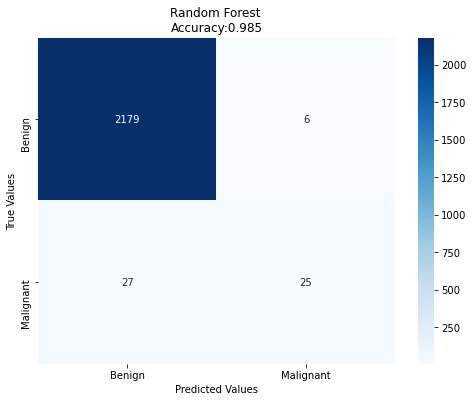

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

# Exercise 4

## Fitting a Random Forest Classifier using SMOTE and Building the Confusion Matrix

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [50]:
clf_random.fit(X_resampled,y_resampled)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [51]:
y_pred=clf_random.predict(X_test)

In [52]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99      2185
   Malignant       0.58      0.71      0.64        52

    accuracy                           0.98      2237
   macro avg       0.79      0.85      0.81      2237
weighted avg       0.98      0.98      0.98      2237



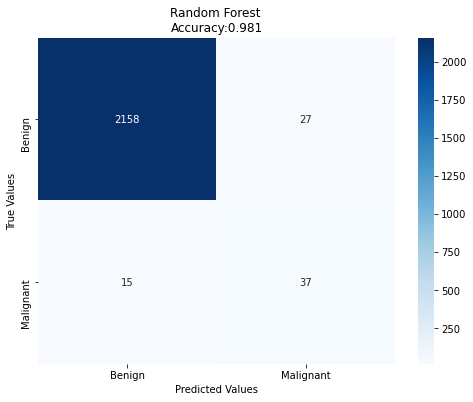

In [53]:
cm = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['Benign', 'Malignant'], 
                     columns = ['Benign', 'Malignant'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()